<a href="https://colab.research.google.com/github/JavaFXpert/qiskit4devs-workshop-notebooks/blob/master/grover_search_party.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Using Grover search for boolean satisfiability
### *Throwing a party while avoiding the drama*

Imagine you are inviting some friends to a party, some who are couples, and some who are not on speaking terms. Specifically, **Alice** and **Bob** are in a relationship, as are **Carol** and **David**. However, **Alice** and **David** had a bad breakup a while ago and haven't been civil with each other since. Armed with a quantum computer and Qiskit Aqua, how can you leverage Grover search algorithm to identify friendly combinations of people to invite?

Fortunately, Grover search may be used for [boolean satisfiability problems](https://en.wikipedia.org/wiki/Boolean_satisfiability_problem), and the constraints for our party planning problem may be formulated with the following boolean expression:

`((A and B) or (C and D)) and not (A and D)`

In [1]:
# Do the necessary import for our program
#!pip install qiskit-aqua
from qiskit import BasicAer
from qiskit.aqua.algorithms import Grover
from qiskit.aqua.components.oracles import LogicalExpressionOracle, TruthTableOracle
from qiskit.tools.visualization import plot_histogram
from qiskit.compiler import transpile

Let's go ahead and use our expression in a Grover search to find out compatible combinations of people to invite.
> Note: We'll represent `and` with `&`, `or` with `|`, `not` with `~` in our expression. 

In [2]:
oracle_type = "Bit" #<-"Log" or "Bit"


#log_expr = '((A & B) | (C & D)) & ~(A & D) & (F | G)'
#log_expr = '(A & B & C)' #<- Oracle for |111>
#bitstr = '00000001'

#log_expr = '(~A & ~B & ~C)' #<- Oracle for |000>
#bitstr = '10000000'

#log_expr = '((~A & ~B & ~C) & (A & B & C))' #<- Oracle for |000> + |111>
#bitstr = '10000001'

log_expr = '(~A & B & C)' #<- Oracle for |110>
bitstr = '00000010'


if oracle_type=="Log":
    algorithm = Grover(LogicalExpressionOracle(log_expr))
    circuit = Grover(LogicalExpressionOracle(log_expr)).construct_circuit()
else:
    algorithm = Grover(TruthTableOracle(bitstr))
    circuit = Grover(TruthTableOracle(bitstr)).construct_circuit()

print(circuit)


          ┌──────────┐ ┌─────────────┐                                        »
v_0: |0>──┤ U2(0,pi) ├─┤ U3(pi,0,pi) ├────────────────────■───────────────────»
          ├──────────┤ └─────────────┘                    │                   »
v_1: |0>──┤ U2(0,pi) ├──────────────────■─────────────────┼────────────────■──»
          ├──────────┤                  │                 │                │  »
v_2: |0>──┤ U2(0,pi) ├──────────────────┼─────────────────┼────────────────┼──»
        ┌─┴──────────┴┐  ┌──────────┐   │                 │                │  »
o_0: |0>┤ U3(pi,0,pi) ├──┤ U2(0,pi) ├───┼─────────────────┼────────────────┼──»
        └─┬──────────┬┘  ├──────────┤ ┌─┴─┐┌───────────┐┌─┴─┐┌──────────┐┌─┴─┐»
a_0: |0>──┤ U2(0,pi) ├───┤ U1(pi/4) ├─┤ X ├┤ U1(-pi/4) ├┤ X ├┤ U1(pi/4) ├┤ X ├»
          └──────────┘   └──────────┘ └───┘└───────────┘└───┘└──────────┘└───┘»
«                                                                             »
«v_0: ──────────────────────────────────

Now we'll run the algorithm on a simulator, printing the result that occurred most often. This result is expressed as the numeric representations of our four friends; a minus sign indicating which ones Grover advised against inviting in that particular result.

In [3]:
# Run the algorithm on a simulator, printing the most frequently occurring result
backend = BasicAer.get_backend('qasm_simulator')

result = algorithm.run(backend)
print(result['top_measurement'])
print(result['measurement'])

110
{'000': 30, '100': 41, '001': 27, '111': 39, '110': 797, '010': 29, '011': 35, '101': 26}


Finally, we'll plot the results. Each basis state represents our four friends, with the least significant bit representing Alice. If a bit is 1, then the advice is to invite the person that the bit represents. If the bit is 0, then Grover advises not to send an invitation.

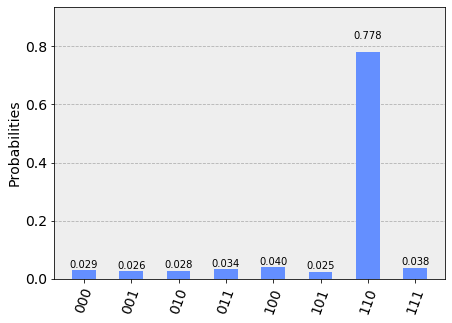

In [4]:
plot_histogram(result['measurement'])

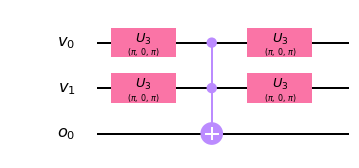

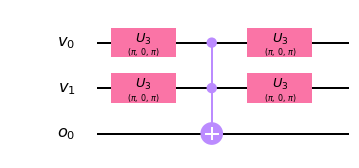

/Users/hassi/anaconda3/envs/Qiskitenv/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:181: UserWarning: Credentials are already in use. The existing account in the session will be replaced.
  warnings.warn('Credentials are already in use. The existing '


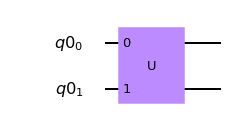

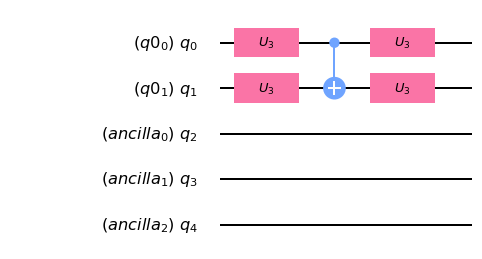

In [5]:
"""Test"""
bitstr_test = '1000'
oracle_test = TruthTableOracle(bitstr_test)
display(oracle_test.circuit.draw(output='mpl'))


expression_test2 = ('(~A & ~B)')
oracle_test2 = LogicalExpressionOracle(expression_test2)
display(oracle_test2.circuit.draw(output='mpl'))

from qiskit.quantum_info.operators import Operator
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, IBMQ
from qiskit.compiler import transpile
%matplotlib inline

IBMQ.load_account()
provider = IBMQ.load_account()

unitary_oracle_0 = Operator([
    [1, 0, 0, 0],
    [0, -1, 0, 0],
    [0, 0, -1, 0],
    [0, 0, 0, -1]])

qr=QuantumRegister(2)
oracle_test3=QuantumCircuit(qr)
oracle_test3.append(unitary_oracle_0,qr)
display(oracle_test3.draw(output='mpl'))


device = provider.get_backend('ibmqx2')
trans_test = transpile(oracle_test3, device)
trans_test.draw()


In [6]:
trans_bell2 = transpile(bell2, device)
trans_bell2.draw()

NameError: name 'bell2' is not defined

Ch 8: Running “diagnostics” with the state vector simulator
-----------------------------------------------------------
1 qubit quantum circuit:
------------------------
        
q_0: |0>
        
 c_0: 0 
        
State vector for the 1 qubit circuit:

 [1.+0.j 0.+0.j]

State vector as Bloch sphere.



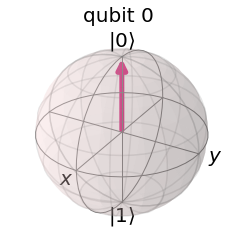


State vector as Q sphere.


None

Press enter to continue...

1 qubit quantum circuit:
------------------------
        ┌───┐
q_0: |0>┤ H ├
        └───┘
 c_0: 0 ═════
             
State vector for the 1 qubit circuit:

 [0.707+0.j 0.707+0.j]

State vector as Bloch sphere.



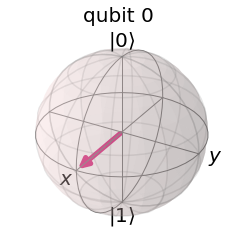


State vector as Q sphere.


None

Press enter to continue...

1 qubit quantum circuit:
------------------------
        ┌───┐┌──────────┐
q_0: |0>┤ H ├┤ Rz(pi/2) ├
        └───┘└──────────┘
 c_0: 0 ═════════════════
                         
State vector for the 1 qubit circuit:

 [0.707+0.j    0.   +0.707j]

State vector as Bloch sphere.



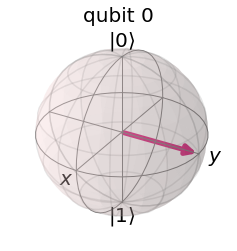


State vector as Q sphere.


None

Press enter to continue...

2 qubit quantum circuit:
------------------------
        
q_0: |0>
        
q_1: |0>
        
 c_0: 0 
        
 c_1: 0 
        
State vector for the 2 qubit circuit:

 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]

State vector as Bloch sphere.



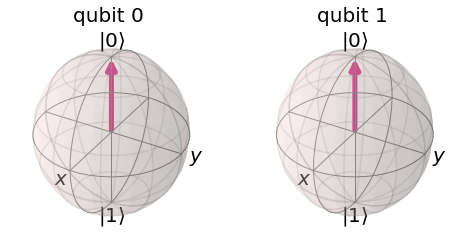


State vector as Q sphere.


None

In [ ]:
print("Ch 8: Running “diagnostics” with the state vector simulator")
print("-----------------------------------------------------------")



# Import the required Qiskit classes
from qiskit import(
    QuantumCircuit,
    execute,
    Aer,
    IBMQ)

# Import Blochsphere visualization
from qiskit.visualization import *

# Import some math that we will need
from math import pi

# Set numbers display options
import numpy as np
np.set_printoptions(precision=3)

# Create a function that requests and display the state vector
# Use this function as a diagnositc tool when constructing your circuits
backend = Aer.get_backend('statevector_simulator') 

def s_vec(circuit):
    print(circuit.n_qubits, "qubit quantum circuit:\n------------------------")
    print(circuit)
    psi=execute(circuit, backend).result().get_statevector(circuit)
    print("State vector for the",circuit.n_qubits,"qubit circuit:\n\n",psi)
    print("\nState vector as Bloch sphere.\n")
    display(plot_bloch_multivector(psi))
    print("\nState vector as Q sphere.")
    display(iplot_state_qsphere(psi,figsize=(5,5)))
    input("Press enter to continue...\n")

# One qubit states
qc = QuantumCircuit(1,1)
s_vec(qc)
qc.h(0)
s_vec(qc)
qc.rz(pi/2,0)
s_vec(qc)

# Two qubit states
qc = QuantumCircuit(2,2)
s_vec(qc)
qc.h([0])
s_vec(qc)
qc.swap(0,1)
s_vec(qc)


# Entangled qubit states
qc = QuantumCircuit(2,2)
s_vec(qc)
qc.h(0)
s_vec(qc)
qc.cx(0,1)
s_vec(qc)
qc.rz(pi/4,0)
s_vec(qc)

# Three qubit states
qc = QuantumCircuit(3,3)
s_vec(qc)
qc.h(0)
s_vec(qc)
qc.h(1)
s_vec(qc)
qc.ccx(0,1,2)
s_vec(qc)
qc.rz(pi/4,0)
s_vec(qc)


# Notice how the Bloch sphere visualization doesn't lend itself very well to displaying entangled qubits, as they cannot be thought of as individual entities. And there is no good way of displaying multiple qubits on one Bloch sphere. A better option here is the density matrix, displayed as a state city.

# Measuring entangled qubits
qc.measure([0,1],[0,1])
print("Running the",qc.n_qubits,"qubit circuit on the qasm_simulator:\n")
print(qc)
backend_count = Aer.get_backend('qasm_simulator') 
counts=execute(qc, backend_count,shots=10000).result().get_counts(qc)
print("Result:\n", counts)




#### Now it's you're turn to play!

Create and implement your own scenario that can be modeled as a boolean satisfiability problem using Grover search. Have fun with it, and carry on with your quantum computing journey!